In [2]:
# Load data & initial setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from datasets import load_dataset


c:\Users\Gumiuk\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load dataset
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()

# Convert skills column from string to list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [7]:
# Basic data overview:
print(
    "Number of rows:", df.shape[0],"\n"
    "Number of columns:", df.shape[1],"\n")

print(df.info())


Number of rows: 785741 
Number of columns: 17 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   f

In [8]:
# Missing values analysis

missing_count = df.isna().sum()
missing_pct = (missing_count / len(df)) * 100   

missing_df = pd.DataFrame({
    'missing_count': missing_count,
    'missing_pct': missing_pct
}).sort_values('missing_count', ascending=False)

missing_df[missing_df['missing_count'] > 0]


,missing_count,missing_pct
salary_hour_avg,775079,98.643064
salary_year_avg,763738,97.199713
salary_rate,752674,95.791616
job_type_skills,117037,14.895112
job_skills,117037,14.895112
job_schedule_type,12667,1.612109
job_location,1045,0.132995
job_country,49,0.006236
company_name,18,0.002291
job_via,8,0.001018


Text(0, 0.5, '')

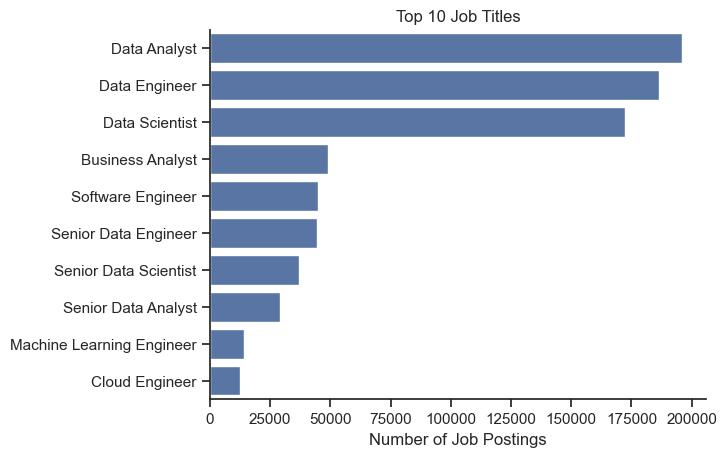

In [10]:
# Visualisation of most common job titles

sns.countplot(
    data=df,
    y='job_title_short',
    order=df['job_title_short'].value_counts().head(10).index
)

sns.despine()
sns.set_theme(style="ticks")
plt.title('Top 10 Job Titles')
plt.xlabel('Number of Job Postings')
plt.ylabel('')


In [12]:
eu_list = [
    "Albania", "Andorra", "Austria", "Belgium", "Belarus",
    "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Montenegro",
    "Czech Republic", "Denmark", "Estonia", "Finland", "France",
    "Greece", "Spain", "Netherlands", "Ireland", "Iceland", "Kosovo",
    "Liechtenstein", "Lithuania", "Luxembourg", "Latvia",
    "North Macedonia", "Malta", "Moldova", "Monaco", "Germany",
    "Norway", "Poland", "Portugal", "Romania", "Russia",
    "San Marino", "Serbia", "Slovakia", "Slovenia", "Switzerland",
    "Sweden", "Turkey", "Ukraine", "Vatican City", "Hungary",
    "United Kingdom", "Italy"
]

# Filter by EU country and Data Analyst position

df_eu = df.copy()
df_eu = df_eu[(df_eu['job_location'].isin(eu_list)) & (df_eu['job_title_short'].str.lower() == "data analyst")]

Text(0, 0.5, 'Country name')

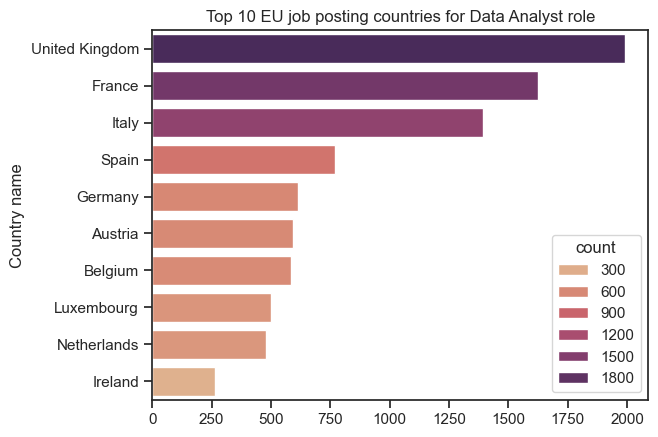

In [13]:
#  Visualisation of top 10 EU job posting countries
 
df_top_countries = df_eu['job_location'].value_counts().sort_values(ascending=False).head(10).reset_index()
df_top_countries.columns = ['country', 'count']

sns.set_theme(style='ticks')
sns.barplot(data=df_top_countries,x='count',y='country', hue='count', palette='flare')

plt.title('Top 10 EU job posting countries for Data Analyst role')
plt.xlabel('')
plt.ylabel('Country name')

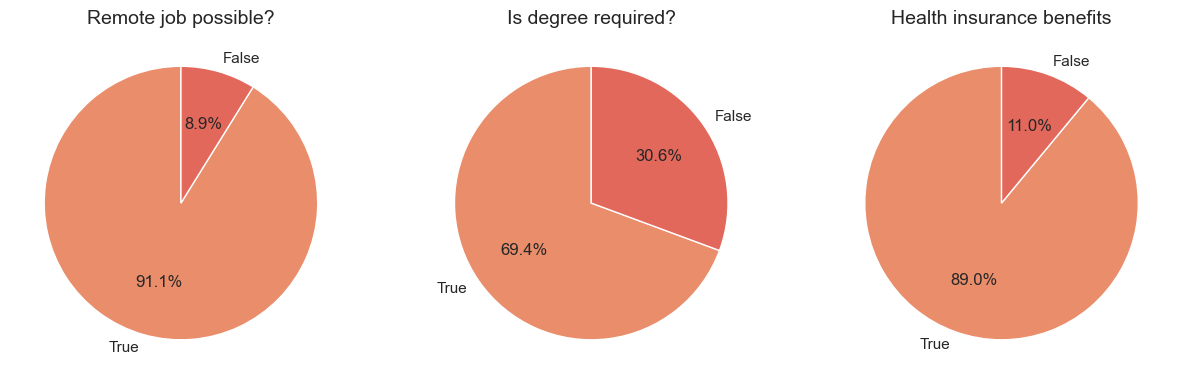

In [ ]:
# Remote work, education & benefits exploration

dict_column = {
    'job_work_from_home': 'Remote job possible?',
    'job_no_degree_mention': 'Is degree required?',
    'job_health_insurance': 'Health insurance benefits'
}

colors = sns.color_palette('flare')

fig,ax = plt.subplots(1,3,figsize=(15,10))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),
        labels=[True,False],
        autopct='%1.1F%%',
        startangle=90,
        colors=colors,
)
    ax[i].set_title(title,fontsize=14)


Text(0, 0.5, 'Company name')

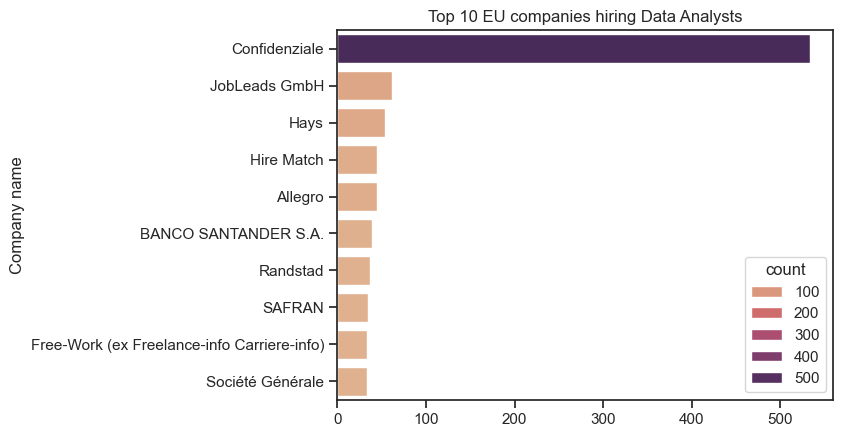

In [ ]:
# Most popular EU companies analysis

df_top_companies = df_eu['company_name'].value_counts().sort_values(ascending=False).head(10).reset_index()
df_top_companies.columns = ['company', 'count']

sns.set_theme(style='ticks')
sns.barplot(data=df_top_companies,x='count',y='company', hue='count', palette='flare')

plt.title('Top 10 EU companies hiring Data Analysts')
plt.xlabel('')
plt.ylabel('Company name')